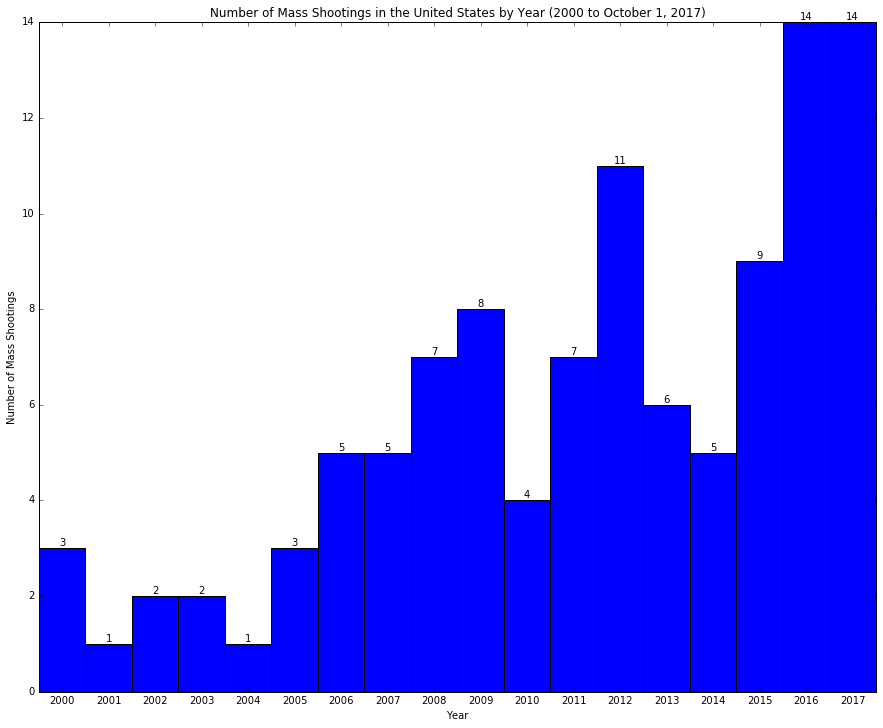

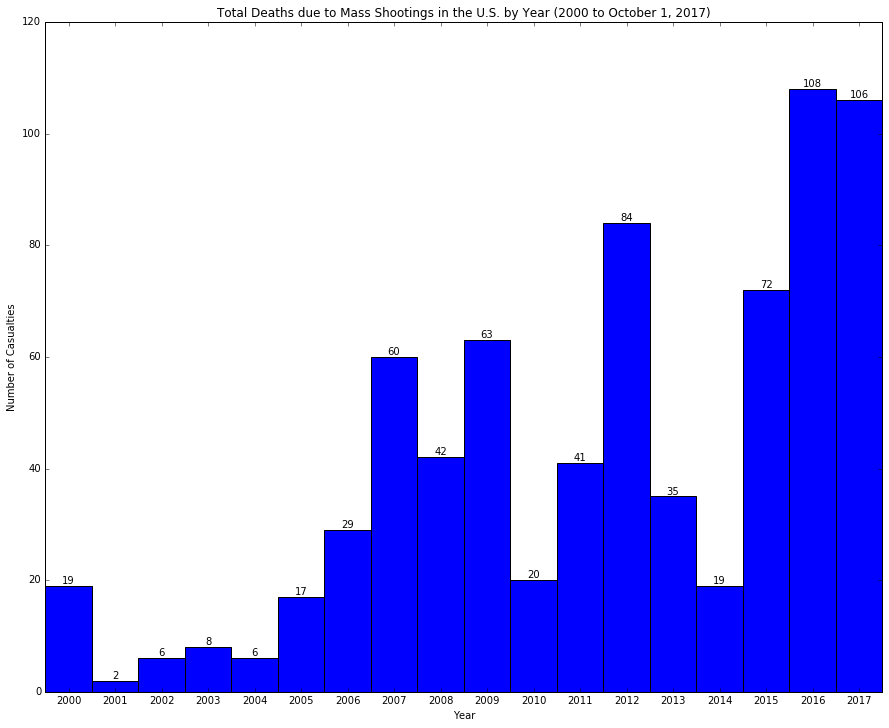

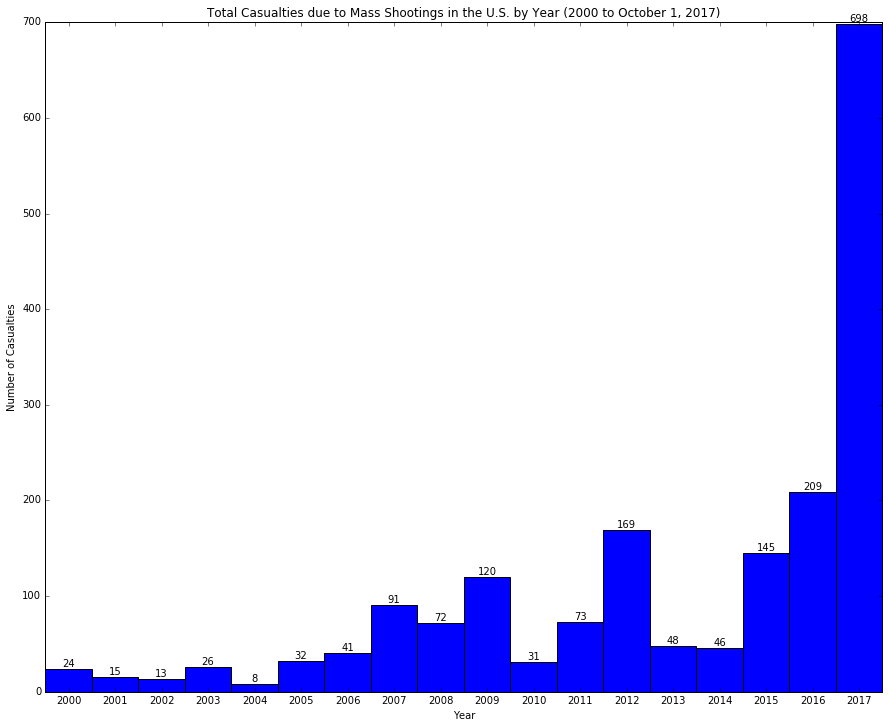

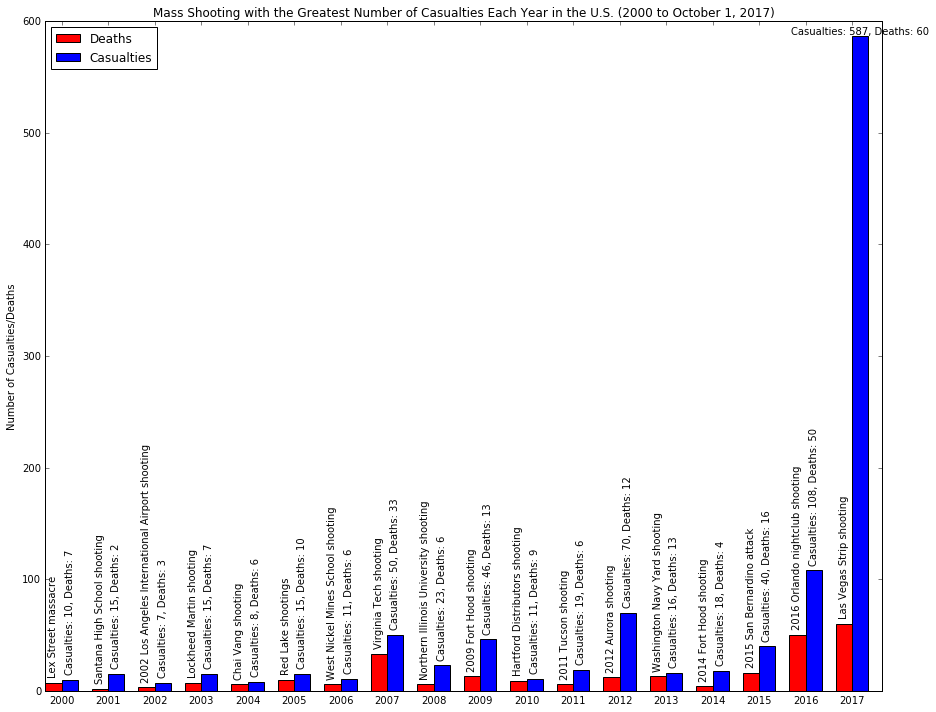

In [3]:
import os
import sys
import operator as op

import pandas as pd

get_ipython().magic(u'matplotlib inline')
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

import random
import numpy as np
import csv

figsize = (15,12)

years = range(2000,2018)
massacres = [3,1,2,2,1,3,5,5,7,8,4,7,11,6,5,9,14,14]

# 2000 (3) (deaths, injuries)
lex_street = np.array([7,3])
wake_field = np.array([7,0])
wendys = np.array([5,2])
casualties_2000 = lex_street + wake_field + wendys
casualties_2000_max = lex_street

# 2001 (1)
santana_hs = np.array([2,13])
casualties_2001 = santana_hs
casualties_2001_max = santana_hs

# 2002 (2)
appalachian = np.array([3,3])
los_angeles_airport_2002 = np.array([3,4])
casualties_2002 = appalachian + los_angeles_airport_2002
casualties_2002_max = los_angeles_airport_2002

# 2003 (2)
ennis_2003 = np.array([1,10])
lockheed_martin = np.array([7,8])
casualties_2003 = ennis_2003 + lockheed_martin
casualties_2003_max = lockheed_martin

# 2004 (1)
chai_vang = np.array([6,2])
casualties_2004 = chai_vang
casualties_2004_max = chai_vang

# 2005 (3)
terry_ratzmann = np.array([7,4])
red_lake = np.array([10,5])
tacoma_mall = np.array([0,6])
casualties_2005 = terry_ratzmann + red_lake + tacoma_mall
casualties_2005_max = red_lake

# 2006 (5)
capitol_hill = np.array([7,2])
goleta_postal_facility = np.array([8,0])
indianapolis = np.array([7,0])
seattle_jewish_federation_2006 = np.array([1,5]) # 6 total injuries, 1 gunfire
west_nickel_mines_school = np.array([6,5])
casualties_2006 = capitol_hill + goleta_postal_facility + \
        indianapolis + seattle_jewish_federation_2006 + \
        west_nickel_mines_school
casualties_2006_max = west_nickel_mines_school

# 2007 (5)
colorado_ywam_new_life_2007 = np.array([5,5])
crandon_wisconsin = np.array([7,1])
trolley_square = np.array([6,4])
virginia_tech = np.array([33,17]) # 23 injuries total, 17 by gunfire
westroads_mall = np.array([9,4]) # 6 injuries total, 4 from gunfire
casualties_2007 = colorado_ywam_new_life_2007 + crandon_wisconsin + \
        trolley_square + virginia_tech + westroads_mall 
casualties_2007_max = virginia_tech

# 2008 (7)
atlanta_plastics = np.array([6,1])
covina = np.array([10,2]) # 3 injuries total, 2 from gunfire
kirkwood_city_council = np.array([7,1])
knoxville_unitarian_church = np.array([2,6]) # 7 injuries total, 6 by gunfire
lane_bryant = np.array([5,1])
northern_illinois_uni = np.array([6,17]) # 21 injuries total, 17 by gunfire
skagit_county_2008 = np.array([6,2])
casualties_2008 = atlanta_plastics + covina + kirkwood_city_council + \
        knoxville_unitarian_church + lane_bryant + northern_illinois_uni + \
        skagit_county_2008
casualties_2008_max = northern_illinois_uni

# 2009 (8)
binghamton = np.array([14,4])
carthage_nursing_home = np.array([8,3])
collier_township_2009 = np.array([4,9])
fort_hood_2009 = np.array([13,33])
geneva_county = np.array([11,6])
lakewood_2009 = np.array([5,0])
pearcy = np.array([5,0])
pittsburgh_police_2009 = np.array([3,2]) # 3 injuries total, 2 gunfire
casualties_2009 = binghamton + carthage_nursing_home + \
        collier_township_2009 + fort_hood_2009 + geneva_county + \
        lakewood_2009 + pearcy + pittsburgh_police_2009
casualties_2009_max = fort_hood_2009

# 2010 (4)
abb_plant_2010 = np.array([4,5])
hartford_distributors = np.array([9,2])
penske = np.array([4,1])
uni_of_alabama_2010 = np.array([3,3])
casualties_2010 = abb_plant_2010 + hartford_distributors + \
        penske + uni_of_alabama_2010
casualties_2010_max = hartford_distributors

# 2011 (7)
copley_township_2011 = np.array([8,1])
cupertino_quarry = np.array([3,6])
grand_rapids_2011 = np.array([8,2])
ihop_2011 = np.array([5,7])
seal_beach_2011 = np.array([8,1])
southern_cali_edison = np.array([3,2])
tucson_2011 = np.array([6,13]) # 15 total injuries, 13 by gunfire
casualties_2011 = copley_township_2011 + cupertino_quarry + \
        grand_rapids_2011 + ihop_2011 + seal_beach_2011 + \
        southern_cali_edison + tucson_2011
casualties_2011_max = tucson_2011

# 2012 (11)
aurora_2012 = np.array([12,58]) # 70 total injuries, 58 from gunfire
azana_spa_2012 = np.array([4,4])
chardon_high = np.array([3,3])
clackamas_town_center = np.array([3,1])
college_station_2012 = np.array([3,4])
minneapolis_2012 = np.array([7,2])
oikos_university = np.array([7,3])
sandy_hook = np.array([28,2])
seattle_cafe_2012 = np.array([6,1])
webster_2012 = np.array([4,3])
wisconsin_sikh_temple = np.array([7,4])
casualties_2012 = aurora_2012 + azana_spa_2012 + \
    + chardon_high + clackamas_town_center + college_station_2012 + \
    + minneapolis_2012 + oikos_university + sandy_hook + \
    + seattle_cafe_2012 + webster_2012 + wisconsin_sikh_temple
casualties_2012_max = aurora_2012

# 2013 (6)
hialeah_2013 = np.array([7,0])
la_airport_2013 = np.array([1,4]) # 7 injuries total, 4 from gunfire
ross_township = np.array([3,4])
santa_monica_2013 = np.array([6,2]) # 4 injuries total, 2 from gunfire
south_valley_2013 = np.array([5,0])
washington_navy_yard = np.array([13,3]) # 8 injuries total, 3 from gunfire
casualties_2013 = hialeah_2013 + la_airport_2013 + ross_township + \
        + santa_monica_2013 + south_valley_2013 + washington_navy_yard
casualties_2013_max = washington_navy_yard

# 2014 (5)
fort_hood_2014 = np.array([4,14]) # 14 injuries total, 12 from gunfire
isla_vista_2014 = np.array([4,7]) # 7 deaths total, 4 by gunfire, 14 injuries total, 7 by gunfire
marysville_pilchuck_hs = np.array([5,1]) # 3 injuries total, 1 by gunfire
rosemary_anderson_hs = np.array([0,4])
harris_county_2014 = np.array([6,1])
casualties_2014 = fort_hood_2014 + isla_vista_2014 + \
        marysville_pilchuck_hs + rosemary_anderson_hs + \
        harris_county_2014
casualties_2014_max = fort_hood_2014

# 2015 (9)
charleston_church = np.array([9,1])
chattanooga_2015 = np.array([6,2])
colorado_springs = np.array([3,9])
harris_county_2015 = np.array([8,0])
lafayette_2015 = np.array([3,9])
san_bernadino_2015 = np.array([16,24])
tyrone_2015 = np.array([8,1])
umpqua_community_college = np.array([10,9]) # 7-9 injuries
waco_2015 = np.array([9,18])
casualties_2015 = charleston_church + chattanooga_2015 + \
        colorado_springs + harris_county_2015 + lafayette_2015 + \
        san_bernadino_2015 + tyrone_2015 + \
        umpqua_community_college + waco_2015
casualties_2015_max = san_bernadino_2015

# 2016 (14)
baton_rouge_police_2016 = np.array([4,3])
cascade_mall_2016 = np.array([5,0])
citronelle_2016 = np.array([6,0])
dallas_police_2016 = np.array([6,11])
freightcar_america = np.array([2,3])
hesston_2016 = np.array([4,14])
kalamazoo_2016 = np.array([6,2])
madison_hs = np.array([0,4])
mukilteo_2016 = np.array([3,1])
orlando_nightclub_2016 = np.array([50,58])
pike_county_2016 = np.array([8,0])
pablo_antonio = np.array([5,0])
st_joseph_courthouse = np.array([3,2])
wilkinsburg_2016 = np.array([6,3])
casualties_2016 = baton_rouge_police_2016 + cascade_mall_2016 + \
        citronelle_2016 + dallas_police_2016 + freightcar_america + \
        hesston_2016 + kalamazoo_2016 + madison_hs + mukilteo_2016 + \
        orlando_nightclub_2016 + pike_county_2016 + pablo_antonio + \
        st_joseph_courthouse + wilkinsburg_2016
casualties_2016_max = orlando_nightclub_2016

# 2017 (14)
bronx_lebanon_hospital = np.array([2,6])
burnette_chapel = np.array([1,8])
clovis_library_2017 = np.array([2,4])
congressional_baseball_2017 = np.array([1,4]) # 6 injuries total, 4 gunfire
fort_lauderdale_airport_2017 = np.array([5,6]) # +-42 injuries, 6 gunfire
freeman_hs = np.array([1,3]) # got this off CNN
las_vegas_strip = np.array([60,527]) # ballpark numbers
little_rock_nightclub = np.array([0,25]) # 28 injuries, 25 gunfire
mississippi_2017 = np.array([8,1])
orlando_2017 = np.array([6,0])
plano_2017 = np.array([9,1])
sandy_2017 = np.array([3,2])
ups_shooting_san_fran = np.array([4,5])
weis_markets_2017 = np.array([4,0])
casualties_2017 = bronx_lebanon_hospital + burnette_chapel + \
        clovis_library_2017 + congressional_baseball_2017 + \
        fort_lauderdale_airport_2017 + freeman_hs + las_vegas_strip + \
        little_rock_nightclub + mississippi_2017 + orlando_2017 + \
        plano_2017 + sandy_2017 + ups_shooting_san_fran + weis_markets_2017
casualties_2017_max = las_vegas_strip

# Total deaths for each year
deaths = np.array([
    casualties_2000[0],
    casualties_2001[0],
    casualties_2002[0],
    casualties_2003[0],
    casualties_2004[0],
    casualties_2005[0],
    casualties_2006[0],
    casualties_2007[0],
    casualties_2008[0],
    casualties_2009[0],
    casualties_2010[0],
    casualties_2011[0],
    casualties_2012[0],
    casualties_2013[0],
    casualties_2014[0],
    casualties_2015[0],
    casualties_2016[0],
    casualties_2017[0],
])

# Total injuries for each year
injuries = np.array([
    casualties_2000[1],
    casualties_2001[1],
    casualties_2002[1],
    casualties_2003[1],
    casualties_2004[1],
    casualties_2005[1],
    casualties_2006[1],
    casualties_2007[1],
    casualties_2008[1],
    casualties_2009[1],
    casualties_2010[1],
    casualties_2011[1],
    casualties_2012[1],
    casualties_2013[1],
    casualties_2014[1],
    casualties_2015[1],
    casualties_2016[1],
    casualties_2017[1],
])

# Total casualties for each year
casualties = deaths + injuries

# Deaths for incident with max casualties each year
deaths_max = np.array([
    casualties_2000_max[0],
    casualties_2001_max[0],
    casualties_2002_max[0],
    casualties_2003_max[0],
    casualties_2004_max[0],
    casualties_2005_max[0],
    casualties_2006_max[0],
    casualties_2007_max[0],
    casualties_2008_max[0],
    casualties_2009_max[0],
    casualties_2010_max[0],
    casualties_2011_max[0],
    casualties_2012_max[0],
    casualties_2013_max[0],
    casualties_2014_max[0],
    casualties_2015_max[0],
    casualties_2016_max[0],
    casualties_2017_max[0],
])

# Injuries for incident with max casualties each year
injuries_max = np.array([
    casualties_2000_max[1],
    casualties_2001_max[1],
    casualties_2002_max[1],
    casualties_2003_max[1],
    casualties_2004_max[1],
    casualties_2005_max[1],
    casualties_2006_max[1],
    casualties_2007_max[1],
    casualties_2008_max[1],
    casualties_2009_max[1],
    casualties_2010_max[1],
    casualties_2011_max[1],
    casualties_2012_max[1],
    casualties_2013_max[1],
    casualties_2014_max[1],
    casualties_2015_max[1],
    casualties_2016_max[1],
    casualties_2017_max[1],
])

# Casualties for incident with max casualties each year
casualties_max = deaths_max + injuries_max

N = 18
ind = np.arange(N)  # the x locations for the groups
width = 1.0       # the width of the bars

"""
plt.figure(figsize=figsize)
plt.bar(ind, massacres, width)#, align='center', alpha=0.5)
plt.xticks(ind + width/2, years)#, objects)
plt.xlabel('Year')
plt.ylabel('Number of Mass Shootings')
plt.title('Number of Mass Shootings in the United States by Year (2000 to October 1, 2017)')
plt.show()

plt.figure(figsize=figsize)
plt.bar(ind, deaths, width)#, align='center', alpha=0.5)
plt.xticks(ind + width/2, years)#, objects)
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Total Deaths in Mass Shootings in the United States by Year (2000 to October 1, 2017)')
plt.show()

plt.figure(figsize=figsize)
plt.bar(ind, casualties, width)#, align='center', alpha=0.5)
plt.xticks(ind + width/2, years)#, objects)
plt.xlabel('Year')
plt.ylabel('Number of Casualties')
plt.title('Total Casualties in Mass Shootings in the United States by Year (2000 to October 1, 2017)')
plt.show()
"""

fig, ax = plt.subplots(figsize=figsize)
rects = ax.bar(ind, massacres, width)#, align='center', alpha=0.5)
plt.xticks(ind + width/2, years)#, objects)
plt.xlabel('Year')
plt.ylabel('Number of Mass Shootings')
plt.title('Number of Mass Shootings in the United States by Year (2000 to October 1, 2017)')
for i, value in enumerate(massacres):
    height = rects[i].get_height()
    ax.text(rects[i].get_x() + rects[i].get_width()/2, height, value, ha='center', va='bottom')
plt.savefig('plot1.png')
plt.show()

fig, ax = plt.subplots(figsize=figsize)
rects = ax.bar(ind, deaths, width)#, align='center', alpha=0.5)
plt.xticks(ind + width/2, years)#, objects)
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Total Deaths due to Mass Shootings in the U.S. by Year (2000 to October 1, 2017)')
for i, value in enumerate(deaths):
    height = rects[i].get_height()
    ax.text(rects[i].get_x() + rects[i].get_width()/2, height, value, ha='center', va='bottom')
plt.savefig('plot2.png')
plt.show()

fig, ax = plt.subplots(figsize=figsize)
rects = ax.bar(ind, casualties, width)#, align='center', alpha=0.5)
plt.xticks(ind + width/2, years)#, objects)
plt.xlabel('Year')
plt.ylabel('Number of Casualties')
plt.title('Total Casualties due to Mass Shootings in the U.S. by Year (2000 to October 1, 2017)')
for i, value in enumerate(casualties):
    height = rects[i].get_height()
    ax.text(rects[i].get_x() + rects[i].get_width()/2, height, value, ha='center', va='bottom')
plt.savefig('plot3.png')
plt.show()

width = 0.35       # the width of the bars
fig, ax = plt.subplots(figsize=figsize)
rects1 = ax.bar(ind, deaths_max.tolist(), width, color='r')
rects2 = ax.bar(ind+width, casualties_max.tolist(), width, color='b')
ax.set_title('Mass Shooting with the Greatest Number of Casualties Each Year in the U.S. (2000 to October 1, 2017)')
ax.set_ylabel('Number of Casualties/Deaths')
ax.set_xticks(ind + width)
ax.set_xticklabels(years)
ax.legend((rects1[0], rects2[0]), ('Deaths', 'Casualties'),loc=2)

labels = [
    'Lex Street massacre', #2000
    'Santana High School shooting', #2001
    '2002 Los Angeles International Airport shooting', #2002
    'Lockheed Martin shooting', #2003
    'Chai Vang shooting', #2004
    'Red Lake shootings', #2005
    'West Nickel Mines School shooting', #2006
    'Virginia Tech shooting', #2007
    'Northern Illinois University shooting', #2008
    '2009 Fort Hood shooting', #2009
    'Hartford Distributors shooting', #2010
    '2011 Tucson shooting', #2011
    '2012 Aurora shooting', #2012
    'Washington Navy Yard shooting', #2013
    '2014 Fort Hood shooting', #2014
    '2015 San Bernardino attack', #2015
    '2016 Orlando nightclub shooting', #2016
    'Las Vegas Strip shooting' #2017
]

# Labels for name of shooting
for rect, label in zip(rects1, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', rotation='vertical')

# Labels for values
for i in ind:
    label = 'Casualties: ' + str(casualties_max[i]) + ', Deaths: ' + str(deaths_max[i])
    height = rects2[i].get_height()
    if i != 17:
        ax.text(rects2[i].get_x() + rects2[i].get_width()/2, height + 5, label, ha='center', va='bottom', rotation='vertical')
    else:
        ax.text(rects2[i].get_x() + rects2[i].get_width()/2, height, label, ha='center', va='bottom')
plt.savefig('plot4.png')